In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, min_samples_split=2), n_estimators=32, learning_rate=0.1, algorithm='SAMME.R', random_state=35)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and AdaBoost classifier for training
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Perform 10-fold cross-validation
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Fit the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation:", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_qt_ab=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensembl

Cross-validation scores: [0.88888889 1.         1.         0.875      1.         1.
 0.75       0.75       1.         0.875     ]
Mean CV accuracy: 0.913888888888889


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Testing Set Accuracy with cross-validation: 0.9523809523809523
printing precision
0.9642857142857143
f1-score
0.9481481481481482
Testing Set Accuracy without cross-validation: 0.9523809523809523
Testing Set Accuracy without cross-validation: 0.9523809523809523
ROC AUC: 0.9663461538461539
recall
0.9375
kappa score
0.896551724137931
log loss
0.21421971853305724
MCC
0.9013878188659973


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=None, min_samples_split=4,random_state=39)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Decision Tree classifier for training and testing
pipeline_cv_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_dt = cross_val_score(pipeline_cv_dt, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Decision Tree):", cv_scores_dt)
print("Mean CV accuracy (Decision Tree):", np.mean(cv_scores_dt))

# Train the model on the entire training set using pipeline_cv_dt
pipeline_cv_dt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test_dt = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Decision Tree):", test_accuracy_test_dt)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_qt_dt=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_dt.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Decision Tree): [0.88888889 1.         0.88888889 0.75       0.75       1.
 0.875      0.875      1.         0.625     ]
Mean CV accuracy (Decision Tree): 0.8652777777777778
Testing Set Accuracy with cross-validation (Decision Tree): 0.9523809523809523
printing precision
0.9642857142857143
f1-score
0.9481481481481482
Testing Set Accuracy without cross-validation: 0.9523809523809523
Testing Set Accuracy without cross-validation: 0.9523809523809523
ROC AUC: 0.9375
recall
0.9375
kappa score
0.896551724137931
log loss
1.7163644471008168
MCC
0.9013878188659973


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef, roc_auc_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=40)


# Define Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Gaussian Naive Bayes classifier for training and testing
pipeline_cv_gnb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gnb)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_gnb = cross_val_score(pipeline_cv_gnb, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Gaussian Naive Bayes):", cv_scores_gnb)
print("Mean CV accuracy (Gaussian Naive Bayes):", np.mean(cv_scores_gnb))

# Train the model on the entire training set using pipeline_cv_gnb
pipeline_cv_gnb.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_gnb.predict(X_test)
test_accuracy_test_gnb = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Gaussian Naive Bayes):", test_accuracy_test_gnb)
accuracy_qt_gnb=test_accuracy_test_gnb
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, pipeline_cv_gnb.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Gaussian Naive Bayes): [0.88888889 0.88888889 0.88888889 0.875      0.875      0.875
 1.         1.         1.         0.75      ]
Mean CV accuracy (Gaussian Naive Bayes): 0.9041666666666666
Testing Set Accuracy with cross-validation (Gaussian Naive Bayes): 0.9523809523809523





Precision: 0.9666666666666667
F1 Score: 0.9442970822281167
Recall: 0.9285714285714286
Kappa Score: 0.8888888888888888
Log Loss: 1.7163644471008168
Matthews Correlation Coefficient: 0.8944271909999159


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.19, random_state=42)


# Define KNN classifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance',algorithm='auto', p=3, n_jobs=3)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and KNN classifier for training and testing
pipeline_cv_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_knn = cross_val_score(pipeline_cv_knn, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (KNN):", cv_scores_knn)
print("Mean CV accuracy (KNN):", np.mean(cv_scores_knn))

# Train the model on the entire training set using pipeline_cv_knn
pipeline_cv_knn.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test_knn = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (KNN):", test_accuracy_test_knn)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_qt_knn=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_knn.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (KNN): [0.88888889 0.77777778 0.44444444 0.88888889 1.         1.
 0.875      1.         0.75       1.        ]
Mean CV accuracy (KNN): 0.8625
Testing Set Accuracy with cross-validation (KNN): 0.95
printing precision
0.9642857142857143
f1-score
0.9430199430199431
Testing Set Accuracy without cross-validation: 0.95
Testing Set Accuracy without cross-validation: 0.95
ROC AUC: 0.956043956043956
recall
0.9285714285714286
kappa score
0.8863636363636364
log loss
0.27544444339485824
MCC
0.8921425711997711


In [15]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, cohen_kappa_score, log_loss, matthews_corrcoef
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Load ARFF file
data, meta = arff.loadarff("C:\\Users\\shanm\\OneDrive\\Desktop\\autistic+spectrum+disorder+screening+data+for+adolescent\\Autism-Adolescent-Data.arff")

# Define data types mapping
dtype_mapping = {
    'A1_Score': 'bool',
    'A2_Score': 'bool',
    'A3_Score': 'bool',
    'A4_Score': 'bool',
    'A5_Score': 'bool',
    'A6_Score': 'bool',
    'A7_Score': 'bool',
    'A8_Score': 'bool',
    'A9_Score': 'bool',
    'A10_Score': 'bool',
    'age': 'float',
    'gender': 'str',
    'ethnicity': 'str',
    'jundice': 'bool',
    'austim': 'bool',
    'contry_of_res': 'str',
    'used_app_before': 'bool',
    'result': 'float',
    'age_desc': 'str',
    'relation': 'str',
    'Class/ASD': 'str'  # Assuming this is your target variable
}

# Replace missing value symbols ('?' or '') with NaN
for attr in meta.names():
    data[attr] = np.char.strip(np.char.mod('%s', data[attr].astype(str)))
    data[attr][data[attr] == ''] = np.nan

# Convert nominal attributes to strings
for attr in meta.names():
    if meta[attr][0] == 'nominal':
        data[attr] = data[attr].astype(str)

# Convert to DataFrame with specified data types
df = pd.DataFrame(data, columns=meta.names())

# Apply the specified data types
df = df.astype(dtype_mapping)

# Separate columns with nominal values into categorical_df
nominal_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_df = df[nominal_columns]

# Fill missing values in categorical columns with mode
for col in categorical_df.columns:
    mode_val = categorical_df[col].mode()[0]
    categorical_df[col].fillna(mode_val, inplace=True)

# Separate remaining columns into non_categorical_df
non_categorical_columns = [col for col in df.columns if col not in nominal_columns]
non_categorical_df = df[non_categorical_columns]

# Check for missing values in columns with bool values
bool_columns_with_missing = [col for col in non_categorical_df.columns if non_categorical_df[col].dtype == 'bool' and non_categorical_df[col].isnull().any()]
if bool_columns_with_missing:
    print("Missing values found in columns with bool values. Cannot proceed with mean value imputation.")
else:
    # Apply mean value imputation to float columns in non_categorical_df
    float_columns = [col for col in non_categorical_df.columns if non_categorical_df[col].dtype == 'float64']
    non_categorical_df[float_columns] = non_categorical_df[float_columns].fillna(non_categorical_df[float_columns].mean())

# One-hot encode the categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(categorical_df)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_df.columns))

# Join encoded categorical columns with bool and float columns
joined_df = pd.concat([non_categorical_df, encoded_df], axis=1)

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import QuantileTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

# Assuming joined_df contains the joined DataFrame

# Separate features and labels
X = joined_df.iloc[:, :-1]  # Features (all columns except the last one)
y = joined_df.iloc[:, -1]   # Labels (last column)

accuracy_list={}
# Split the data into training and testing sets
  
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=210)
        
# Instantiate LabelEncoder
label_encoder = LabelEncoder()
        
# Encode string labels into numerical values
labels_encoded = label_encoder.fit_transform(y)
        
# Now, you can calculate class counts
class_counts = np.bincount(labels_encoded)
        
# Calculate prior probabilities based on class proportions
prior_probabilities = class_counts / len(labels_encoded)
        
 # Fit Gaussian distributions to the prior probabilities
means = np.mean(prior_probabilities, axis=0)  # Calculate mean for each class
variances = np.var(prior_probabilities, axis=0)  # Calculate variance for each class
        
    # Define the pipeline
pipeline = Pipeline([
    ('transformer', QuantileTransformer(n_quantiles=35,output_distribution='uniform',subsample=60, random_state=91)),
    ('oversampler', RandomOverSampler(random_state=12)),
    ('classifier', LinearDiscriminantAnalysis(solver='svd',priors=prior_probabilities, store_covariance=True, tol=0.99999999))
])
        
    # Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
        
    # Perform 10-fold cross-validation on training data
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)
accuracy_scores = cross_val_score(pipeline, X_train, y_train, cv=cv)
print("\nCross-validation Accuracy (mean):", accuracy_scores.mean())
        
    # Evaluate the model on the testing data
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing dataset(QT_LDA):", accuracy)
accuracy_qt_lda=accuracy

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate Cohen's kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Calculate log loss
logloss = log_loss(y_test, y_pred)

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Other Parameters")
print("Precision :", precision)
print("Recall :", recall)
print("ROC AUC :", roc_auc)
print("F1-score :", f1)
print("Kappa :", kappa)
print("Log Loss :", logloss)
print("MCC :", mcc)


C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\81392801.py:42: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  data[attr][data[attr] == ''] = np.nan
C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\81392801.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[col].fillna(mode_val, inplace=True)
C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\81392801.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_categorical_df[float_columns] = non_categorical_df[float_c


Cross-validation Accuracy (mean): 0.8866666666666667
Accuracy on testing dataset(QT_LDA): 0.9615384615384616
Other Parameters
Precision : 0.9705882352941176
Recall : 0.9705882352941176
ROC AUC : 0.9575163398692811
F1-score : 0.9705882352941176
Kappa : 0.9150326797385621
Log Loss : 1.3862943611198906
MCC : 0.9150326797385621


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef, roc_auc_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.84, random_state=41)


# Define Logistic Regression classifier
lr = LogisticRegression()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Logistic Regression classifier for training and testing
pipeline_cv_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lr = cross_val_score(pipeline_cv_lr, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Logistic Regression):", cv_scores_lr)
print("Mean CV accuracy (Logistic Regression):", np.mean(cv_scores_lr))

# Train the model on the entire training set using pipeline_cv_lr
pipeline_cv_lr.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_lr.predict(X_test)
test_accuracy_test_lr = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Logistic Regression):", test_accuracy_test_lr)
accuracy_qt_lr=test_accuracy_test_lr
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, pipeline_cv_lr.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Logistic Regression): [1.  1.  1.  0.5 1.  1.  0.  1.  1.  1. ]
Mean CV accuracy (Logistic Regression): 0.85
Testing Set Accuracy with cross-validation (Logistic Regression): 0.9318181818181818





Precision: 0.9226579520697167
F1 Score: 0.9272727272727272
Recall: 0.9330357142857143
Kappa Score: 0.8546255506607929
Log Loss: 0.3700342029344679
Matthews Correlation Coefficient: 0.8556307338403571


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.13, random_state=42)

# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Random Forest classifier for training and testing
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Perform 10-fold cross-validation
cv_scores = cross_val_score(pipeline_rf, X_train, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_rf.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_rf = pipeline_rf.predict(X_test)
test_accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("Testing Set Accuracy with cross-validation (Random Forest):", test_accuracy_test_rf)
accuracy_qt_rf=test_accuracy_test_rf
from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test_rf, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test_rf,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_rf.predict_proba(X_test)[:, 1]
y_pred_test_rf = pipeline_rf.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test_rf)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_rf.predict_proba(X_test)[:, 1]
y_pred_test_rf = pipeline_rf.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test_rf)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_rf_svm=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test_rf,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test_rf))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_rf.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test_rf))




C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores: [0.88888889 0.88888889 1.         1.         0.88888889 0.88888889
 1.         1.         1.         1.        ]
Mean CV accuracy: 0.9555555555555555
Testing Set Accuracy with cross-validation (Random Forest): 0.9285714285714286
printing precision
0.9545454545454546
f1-score
0.9047619047619047
Testing Set Accuracy without cross-validation: 0.9285714285714286
Testing Set Accuracy without cross-validation: 0.9285714285714286
ROC AUC: 1.0
recall
0.875
kappa score
0.8108108108108107
log loss
0.4238944648710584
MCC
0.8257228238447705


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC  # Import SVM
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef, roc_auc_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.6, random_state=36)

# Define SVM classifier
svm = SVC()  # Change here to SVC

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and SVM classifier for training and testing
pipeline_cv_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_svm = cross_val_score(pipeline_cv_svm, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (SVM):", cv_scores_svm)
print("Mean CV accuracy (SVM):", np.mean(cv_scores_svm))

# Train the model on the entire training set using pipeline_cv_svm
pipeline_cv_svm.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_svm = pipeline_cv_svm.predict(X_test)
test_accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Testing Set Accuracy with cross-validation (SVM):", test_accuracy_test_svm)
accuracy_qt_svm=test_accuracy_test_svm
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test_svm, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test_svm, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_svm))
# Note: Log Loss, Matthews Correlation Coefficient, and ROC AUC Score might not be available for SVM.


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (SVM): [0.8  0.5  0.75 1.   1.   1.   0.75 0.75 0.75 1.  ]
Mean CV accuracy (SVM): 0.8300000000000001
Testing Set Accuracy with cross-validation (SVM): 0.9206349206349206





Precision: 0.9375
F1 Score: 0.9176470588235295
Recall: 0.9107142857142857
Kappa Score: 0.8363636363636364


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.25, random_state=35)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, min_samples_split=2), n_estimators=32, learning_rate=0.1, algorithm='SAMME.R', random_state=35)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson', standardize=False))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and AdaBoost classifier for training and testing
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set using pipeline_cv
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation:", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_pt_ab=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensembl

Cross-validation scores: [0.875      0.875      1.         1.         1.         0.875
 0.875      0.875      0.85714286 0.71428571]
Mean CV accuracy: 0.8946428571428571


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Testing Set Accuracy with cross-validation: 0.9615384615384616
printing precision
0.9705882352941176
f1-score
0.9585326953748007
Testing Set Accuracy without cross-validation: 0.9615384615384616
Testing Set Accuracy without cross-validation: 0.9615384615384616
ROC AUC: 1.0
recall
0.95
kappa score
0.9171974522292994
log loss
0.14847094446210707
MCC
0.9203579866168445


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=None, min_samples_split=3,random_state=39)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson', standardize=False))  # Using PowerTransformer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Decision Tree classifier for training and testing
pipeline_cv_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=35)

# Perform cross-validation on training set
cv_scores_dt = cross_val_score(pipeline_cv_dt, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Decision Tree):", cv_scores_dt)
print("Mean CV accuracy (Decision Tree):", np.mean(cv_scores_dt))

# Train the model on the entire training set using pipeline_cv_dt
pipeline_cv_dt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_dt = pipeline_cv_dt.predict(X_test)
test_accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
print("Testing Set Accuracy with cross-validation (Decision Tree):", test_accuracy_test_dt)
accuracy_pt_dt=test_accuracy_test_dt


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Decision Tree): [1.         0.77777778 0.88888889 1.         0.875      1.
 1.         0.875      0.875      0.875     ]
Mean CV accuracy (Decision Tree): 0.9166666666666666
Testing Set Accuracy with cross-validation (Decision Tree): 0.9523809523809523


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer  # Updated import
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.25, random_state=38)

# Define Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson', standardize=True))  # Changed QuantileTransformer to PowerTransformer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Gaussian Naive Bayes classifier for training and testing
pipeline_cv_gnb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gnb)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_gnb = cross_val_score(pipeline_cv_gnb, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Gaussian Naive Bayes):", cv_scores_gnb)
print("Mean CV accuracy (Gaussian Naive Bayes):", np.mean(cv_scores_gnb))

# Train the model on the entire training set using pipeline_cv_gnb
pipeline_cv_gnb.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_gnb.predict(X_test)
test_accuracy_test_gnb = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Gaussian Naive Bayes):", test_accuracy_test_gnb)
accuracy_pt_gnb=test_accuracy_test_gnb
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, pipeline_cv_gnb.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Gaussian Naive Bayes): [0.75       1.         0.875      1.         1.         0.875
 0.875      1.         0.71428571 1.        ]
Mean CV accuracy (Gaussian Naive Bayes): 0.9089285714285713
Testing Set Accuracy with cross-validation (Gaussian Naive Bayes): 0.9615384615384616





Precision: 0.96875
F1 Score: 0.9600614439324117
Recall: 0.9545454545454546
Kappa Score: 0.9202453987730062
Log Loss: 1.3867124348661606
Matthews Correlation Coefficient: 0.9231861823449954


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.12, random_state=45)

# Define KNN classifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance', algorithm='auto', p=3, n_jobs=3)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson', standardize=False))  # Using PowerTransformer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and KNN classifier for training and testing
pipeline_cv_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_knn = cross_val_score(pipeline_cv_knn, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (KNN):", cv_scores_knn)
print("Mean CV accuracy (KNN):", np.mean(cv_scores_knn))

# Train the model on the entire training set using pipeline_cv_knn
pipeline_cv_knn.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test_knn = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (KNN):", test_accuracy_test_knn)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_pt_knn=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_knn.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (KNN): [0.8        1.         1.         1.         0.77777778 1.
 0.55555556 0.77777778 0.88888889 0.88888889]
Mean CV accuracy (KNN): 0.868888888888889
Testing Set Accuracy with cross-validation (KNN): 0.9230769230769231
printing precision
0.95
f1-score
0.9022556390977443
Testing Set Accuracy without cross-validation: 0.9230769230769231
Testing Set Accuracy without cross-validation: 0.9230769230769231
ROC AUC: 1.0
recall
0.875
kappa score
0.8059701492537313
log loss
0.15114283325617534
MCC
0.8215838362577492


In [23]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, cohen_kappa_score, log_loss, matthews_corrcoef
from imblearn.over_sampling import RandomOverSampler

# Load ARFF file
data, meta = arff.loadarff("C:\\Users\\shanm\\OneDrive\\Desktop\\autistic+spectrum+disorder+screening+data+for+adolescent\\Autism-Adolescent-Data.arff")

# Define data types mapping
dtype_mapping = {
    'A1_Score': 'bool',
    'A2_Score': 'bool',
    'A3_Score': 'bool',
    'A4_Score': 'bool',
    'A5_Score': 'bool',
    'A6_Score': 'bool',
    'A7_Score': 'bool',
    'A8_Score': 'bool',
    'A9_Score': 'bool',
    'A10_Score': 'bool',
    'age': 'float',
    'gender': 'str',
    'ethnicity': 'str',
    'jundice': 'bool',
    'austim': 'bool',
    'contry_of_res': 'str',
    'used_app_before': 'bool',
    'result': 'float',
    'age_desc': 'str',
    'relation': 'str',
    'Class/ASD': 'str'  # Assuming this is your target variable
}

# Replace missing value symbols ('?' or '') with NaN
for attr in meta.names():
    data[attr] = np.char.strip(np.char.mod('%s', data[attr].astype(str)))
    data[attr][data[attr] == ''] = np.nan

# Convert nominal attributes to strings
for attr in meta.names():
    if meta[attr][0] == 'nominal':
        data[attr] = data[attr].astype(str)

# Convert to DataFrame with specified data types
df = pd.DataFrame(data, columns=meta.names())

# Apply the specified data types
df = df.astype(dtype_mapping)

# Separate columns with nominal values into categorical_df
nominal_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_df = df[nominal_columns]

# Fill missing values in categorical columns with mode
for col in categorical_df.columns:
    mode_val = categorical_df[col].mode()[0]
    categorical_df[col].fillna(mode_val, inplace=True)

# Separate remaining columns into non_categorical_df
non_categorical_columns = [col for col in df.columns if col not in nominal_columns]
non_categorical_df = df[non_categorical_columns]

# Check for missing values in columns with bool values
bool_columns_with_missing = [col for col in non_categorical_df.columns if non_categorical_df[col].dtype == 'bool' and non_categorical_df[col].isnull().any()]
if bool_columns_with_missing:
    print("Missing values found in columns with bool values. Cannot proceed with mean value imputation.")
else:
    # Apply mean value imputation to float columns in non_categorical_df
    float_columns = [col for col in non_categorical_df.columns if non_categorical_df[col].dtype == 'float64']
    non_categorical_df[float_columns] = non_categorical_df[float_columns].fillna(non_categorical_df[float_columns].mean())

# One-hot encode the categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(categorical_df)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_df.columns))

# Join encoded categorical columns with bool and float columns
joined_df = pd.concat([non_categorical_df, encoded_df], axis=1)

# Separate features and labels
X = joined_df.iloc[:, :-1]  # Features (all columns except the last one)
y = joined_df.iloc[:, -1]   # Labels (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode string labels into numerical values
labels_encoded = label_encoder.fit_transform(y)

# Calculate class counts and prior probabilities
class_counts = np.bincount(labels_encoded)
prior_probabilities = class_counts / len(labels_encoded)

# Define the pipeline
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson', standardize=True)),  # Power Transformer
    ('oversampler', RandomOverSampler(random_state=12)),
    ('classifier', LinearDiscriminantAnalysis(solver='svd', priors=prior_probabilities, store_covariance=True, tol=0.99999999))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Perform 10-fold cross-validation on training data
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)
accuracy_scores = cross_val_score(pipeline, X_train, y_train, cv=cv)
print("\nCross-validation Accuracy (mean):", accuracy_scores.mean())

# Evaluate the model on the testing data
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Accuracy on testing dataset(PT_LDA) :", accuracy)
accuracy_pt_lda=accuracy
print("Other Parameters")
print("Precision :", precision)
print("Recall :", recall)
print("ROC AUC :", roc_auc)
print("F1-score :", f1)
print("Kappa :", kappa)
print("Log Loss :", logloss)
print("MCC :", mcc)


C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\430977123.py:42: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  data[attr][data[attr] == ''] = np.nan
C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\430977123.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[col].fillna(mode_val, inplace=True)
C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\430977123.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_categorical_df[float_columns] = non_categorical_df[floa


Cross-validation Accuracy (mean): 0.8714285714285713
Accuracy on testing dataset(PT_LDA) : 0.9411764705882353
Other Parameters
Precision : 1.0
Recall : 0.9047619047619048
ROC AUC : 0.9523809523809523
F1-score : 0.9500000000000001
Kappa : 0.8790035587188613
Log Loss : 2.1202149052421855
MCC : 0.8855094489202158


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer  # Import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.81, random_state=41)

# Define Logistic Regression classifier
lr = LogisticRegression()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson'))  # Change QuantileTransformer to PowerTransformer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Logistic Regression classifier for training and testing
pipeline_cv_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lr = cross_val_score(pipeline_cv_lr, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Logistic Regression):", cv_scores_lr)
print("Mean CV accuracy (Logistic Regression):", np.mean(cv_scores_lr))

# Train the model on the entire training set using pipeline_cv_lr
pipeline_cv_lr.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_lr.predict(X_test)
test_accuracy_test_lr = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Logistic Regression):", test_accuracy_test_lr)
accuracy_pt_lr=test_accuracy_test_lr
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, pipeline_cv_lr.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Logistic Regression): [1.  1.  0.5 1.  1.  1.  1.  1.  1.  1. ]
Mean CV accuracy (Logistic Regression): 0.95
Testing Set Accuracy with cross-validation (Logistic Regression): 0.9529411764705882





Precision: 0.9492234169653524
F1 Score: 0.9492234169653524
Recall: 0.9492234169653524
Kappa Score: 0.8984468339307049
Log Loss: 0.22777608731666524
Matthews Correlation Coefficient: 0.8984468339307049


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.13, random_state=42)

# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Random Forest classifier for training and testing
pipeline_rf_pt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Perform 10-fold cross-validation
cv_scores_rf_pt = cross_val_score(pipeline_rf_pt, X_train, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores (Random Forest with PowerTransformer):", cv_scores_rf_pt)
print("Mean CV accuracy (Random Forest with PowerTransformer):", np.mean(cv_scores_rf_pt))

# Train the model on the entire training set
pipeline_rf_pt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_rf_pt.predict(X_test)
test_accuracy_test_rf_pt = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Random Forest with PowerTransformer):", test_accuracy_test_rf_pt)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_rf_pt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_rf_pt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_rf_pt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_rf_pt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_pt_rf=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_rf_pt.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Random Forest with PowerTransformer): [0.88888889 0.88888889 1.         1.         0.88888889 0.88888889
 1.         1.         1.         1.        ]
Mean CV accuracy (Random Forest with PowerTransformer): 0.9555555555555555
Testing Set Accuracy with cross-validation (Random Forest with PowerTransformer): 0.9285714285714286
printing precision
0.9545454545454546
f1-score
0.9047619047619047
Testing Set Accuracy without cross-validation: 0.9285714285714286
Testing Set Accuracy without cross-validation: 0.9285714285714286
ROC AUC: 1.0
recall
0.875
kappa score
0.8108108108108107
log loss
0.4238944648710584
MCC
0.8257228238447705


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer  # Updated import to PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.8, random_state=38)

# Define SVM classifier
svm = SVC()  # Change here to SVC

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson'))  # Change QuantileTransformer to PowerTransformer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and SVM classifier for training and testing
pipeline_cv_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_svm = cross_val_score(pipeline_cv_svm, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (SVM):", cv_scores_svm)
print("Mean CV accuracy (SVM):", np.mean(cv_scores_svm))

# Train the model on the entire training set using pipeline_cv_svm
pipeline_cv_svm.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_svm = pipeline_cv_svm.predict(X_test)
test_accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Testing Set Accuracy with cross-validation (SVM):", test_accuracy_test_svm)
accuracy_pt_svm=test_accuracy_test_svm
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test_svm, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test_svm, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_svm))
# Note: Log Loss, Matthews Correlation Coefficient, and ROC AUC Score might not be available for SVM.


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (SVM): [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
Mean CV accuracy (SVM): 0.9
Testing Set Accuracy with cross-validation (SVM): 0.9285714285714286





Precision: 0.9482758620689655
F1 Score: 0.9210031347962382
Recall: 0.90625
Kappa Score: 0.8428927680798005


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.24, random_state=35)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, min_samples_split=2), n_estimators=32, learning_rate=0.1, algorithm='SAMME.R', random_state=35)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Using Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and AdaBoost classifier for training and testing
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set using pipeline_cv
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation:", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_nor_ab=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensembl

Cross-validation scores: [1.    0.875 1.    1.    1.    1.    0.875 1.    0.875 1.   ]
Mean CV accuracy: 0.9625


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Testing Set Accuracy with cross-validation: 0.96
printing precision
0.9705882352941176
f1-score
0.9554367201426025
Testing Set Accuracy without cross-validation: 0.96
Testing Set Accuracy without cross-validation: 0.96
ROC AUC: 1.0
recall
0.9444444444444444
kappa score
0.9110320284697508
log loss
0.3462486361697495
MCC
0.9146591207600472


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.39, random_state=38)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=None, min_samples_split=3,random_state=39)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Using Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Decision Tree classifier for training and testing
pipeline_cv_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=35)

# Perform cross-validation on training set
cv_scores_dt = cross_val_score(pipeline_cv_dt, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Decision Tree):", cv_scores_dt)
print("Mean CV accuracy (Decision Tree):", np.mean(cv_scores_dt))

# Train the model on the entire training set using pipeline_cv_dt
pipeline_cv_dt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test_dt = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Decision Tree):", test_accuracy_test_dt)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_nor_dt=test_accuracy_test
from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_dt.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Decision Tree): [1.         0.85714286 1.         1.         0.83333333 0.83333333
 1.         0.83333333 0.66666667 0.66666667]
Mean CV accuracy (Decision Tree): 0.869047619047619
Testing Set Accuracy with cross-validation (Decision Tree): 0.9512195121951219
printing precision
0.9457671957671958
f1-score
0.9457671957671958
Testing Set Accuracy without cross-validation: 0.9512195121951219
Testing Set Accuracy without cross-validation: 0.9512195121951219
ROC AUC: 0.9457671957671957
recall
0.9457671957671958
kappa score
0.8915343915343915
log loss
1.7582269945910807
MCC
0.8915343915343915


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer  # Updated import
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.25, random_state=38)

# Define Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Changed PowerTransformer to Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Gaussian Naive Bayes classifier for training and testing
pipeline_cv_gnb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gnb)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_gnb = cross_val_score(pipeline_cv_gnb, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Gaussian Naive Bayes):", cv_scores_gnb)
print("Mean CV accuracy (Gaussian Naive Bayes):", np.mean(cv_scores_gnb))

# Train the model on the entire training set using pipeline_cv_gnb
pipeline_cv_gnb.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_gnb.predict(X_test)
test_accuracy_test_gnb = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Gaussian Naive Bayes):", test_accuracy_test_gnb)
accuracy_nor_gnb=test_accuracy_test_gnb
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, pipeline_cv_gnb.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Gaussian Naive Bayes): [1.         1.         0.875      1.         1.         0.875
 0.875      1.         0.71428571 1.        ]
Mean CV accuracy (Gaussian Naive Bayes): 0.9339285714285713
Testing Set Accuracy with cross-validation (Gaussian Naive Bayes): 0.9615384615384616





Precision: 0.96875
F1 Score: 0.9600614439324117
Recall: 0.9545454545454546
Kappa Score: 0.9202453987730062
Log Loss: 1.4085261685492
Matthews Correlation Coefficient: 0.9231861823449954


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.14, random_state=45)

# Define KNN classifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance', algorithm='auto', p=3, n_jobs=3)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Using Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and KNN classifier for training and testing
pipeline_cv_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_knn = cross_val_score(pipeline_cv_knn, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (KNN):", cv_scores_knn)
print("Mean CV accuracy (KNN):", np.mean(cv_scores_knn))

# Train the model on the entire training set using pipeline_cv_knn
pipeline_cv_knn.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test_knn = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (KNN):", test_accuracy_test_knn)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_nor_knn=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_knn.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (KNN): [0.77777778 0.88888889 0.77777778 0.88888889 0.88888889 0.77777778
 0.77777778 0.88888889 0.77777778 0.875     ]
Mean CV accuracy (KNN): 0.8319444444444443
Testing Set Accuracy with cross-validation (KNN): 0.9333333333333333
printing precision
0.9545454545454546
f1-score
0.9206349206349207
Testing Set Accuracy without cross-validation: 0.9333333333333333
Testing Set Accuracy without cross-validation: 0.9333333333333333
ROC AUC: 1.0
recall
0.9
kappa score
0.8421052631578947
log loss
0.16215125302265554
MCC
0.8528028654224417


In [31]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, cohen_kappa_score, log_loss, matthews_corrcoef
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Load ARFF file
data, meta = arff.loadarff("C:\\Users\\shanm\\OneDrive\\Desktop\\autistic+spectrum+disorder+screening+data+for+adolescent\\Autism-Adolescent-Data.arff")

# Define data types mapping
dtype_mapping = {
    'A1_Score': 'bool',
    'A2_Score': 'bool',
    'A3_Score': 'bool',
    'A4_Score': 'bool',
    'A5_Score': 'bool',
    'A6_Score': 'bool',
    'A7_Score': 'bool',
    'A8_Score': 'bool',
    'A9_Score': 'bool',
    'A10_Score': 'bool',
    'age': 'float',
    'gender': 'str',
    'ethnicity': 'str',
    'jundice': 'bool',
    'austim': 'bool',
    'contry_of_res': 'str',
    'used_app_before': 'bool',
    'result': 'float',
    'age_desc': 'str',
    'relation': 'str',
    'Class/ASD': 'str'  # Assuming this is your target variable
}

# Replace missing value symbols ('?' or '') with NaN
for attr in meta.names():
    data[attr] = np.char.strip(np.char.mod('%s', data[attr].astype(str)))
    data[attr][data[attr] == ''] = np.nan

# Convert nominal attributes to strings
for attr in meta.names():
    if meta[attr][0] == 'nominal':
        data[attr] = data[attr].astype(str)

# Convert to DataFrame with specified data types
df = pd.DataFrame(data, columns=meta.names())

# Apply the specified data types
df = df.astype(dtype_mapping)

# Separate columns with nominal values into categorical_df
nominal_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_df = df[nominal_columns]

# Fill missing values in categorical columns with mode
for col in categorical_df.columns:
    mode_val = categorical_df[col].mode()[0]
    categorical_df[col].fillna(mode_val, inplace=True)

# Separate remaining columns into non_categorical_df
non_categorical_columns = [col for col in df.columns if col not in nominal_columns]
non_categorical_df = df[non_categorical_columns]

# Check for missing values in columns with bool values
bool_columns_with_missing = [col for col in non_categorical_df.columns if non_categorical_df[col].dtype == 'bool' and non_categorical_df[col].isnull().any()]
if bool_columns_with_missing:
    print("Missing values found in columns with bool values. Cannot proceed with mean value imputation.")
else:
    # Apply mean value imputation to float columns in non_categorical_df
    float_columns = [col for col in non_categorical_df.columns if non_categorical_df[col].dtype == 'float64']
    non_categorical_df[float_columns] = non_categorical_df[float_columns].fillna(non_categorical_df[float_columns].mean())

# One-hot encode the categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(categorical_df)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_df.columns))

# Join encoded categorical columns with bool and float columns
joined_df = pd.concat([non_categorical_df, encoded_df], axis=1)

# Separate features and labels
X = joined_df.iloc[:, :-1]  # Features (all columns except the last one)
y = joined_df.iloc[:, -1]   # Labels (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode string labels into numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', Normalizer()),  # Normalizer
    ('oversampler', RandomOverSampler(random_state=4)),  # Oversampling for class imbalance
    ('classifier', LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.25, priors=None, store_covariance=True, tol=0.00009))  # LDA classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

# Predict on the testing data
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
kappa = cohen_kappa_score(y_test_encoded, y_pred)
logloss = log_loss(y_test_encoded, y_pred)
mcc = matthews_corrcoef(y_test_encoded, y_pred)

# Print evaluation metrics
print("\nAccuracy on testing dataset(Normalizer_LDA) :", accuracy)
accuracy_nor_lda=accuracy
print("Other Parameters")
print("Precision :", precision)
print("Recall :", recall)
print("ROC AUC :", roc_auc)
print("F1-score :", f1)
print("Kappa :", kappa)
print("Log Loss :", logloss)
print("MCC :", mcc)



Accuracy on testing dataset(Normalizer_LDA) : 0.9375
Other Parameters
Precision : 0.9
Recall : 1.0
ROC AUC : 0.9285714285714286
F1-score : 0.9473684210526316
Kappa : 0.8709677419354839
Log Loss : 2.252728336819822
MCC : 0.8783100656536799


C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\942203202.py:42: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  data[attr][data[attr] == ''] = np.nan
C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\942203202.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[col].fillna(mode_val, inplace=True)
C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\942203202.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_categorical_df[float_columns] = non_categorical_df[floa

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer  # Updated import
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.57, random_state=41)

# Define Logistic Regression classifier
lr = LogisticRegression()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Changed PowerTransformer to Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Logistic Regression classifier for training and testing
pipeline_cv_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lr = cross_val_score(pipeline_cv_lr, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Logistic Regression):", cv_scores_lr)
print("Mean CV accuracy (Logistic Regression):", np.mean(cv_scores_lr))

# Train the model on the entire training set using pipeline_cv_lr
pipeline_cv_lr.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_lr.predict(X_test)
test_accuracy_test_lr = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Logistic Regression):", test_accuracy_test_lr)
accuracy_nor_lr=test_accuracy_test_lr
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, pipeline_cv_lr.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Logistic Regression): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV accuracy (Logistic Regression): 1.0
Testing Set Accuracy with cross-validation (Logistic Regression): 0.95





Precision: 0.9625
F1 Score: 0.945635759589248
Recall: 0.9347826086956521
Kappa Score: 0.891566265060241
Log Loss: 0.20682541399072735
Matthews Correlation Coefficient: 0.8968544062928813


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.16, random_state=42)

# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalize', Normalizer())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Random Forest classifier for training and testing
pipeline_rf_normalize = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Perform 10-fold cross-validation
cv_scores = cross_val_score(pipeline_rf_normalize, X_train, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_rf_normalize.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_rf_normalize.predict(X_test)
test_accuracy_test_rf_normalize = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Random Forest with Normalizer):", test_accuracy_test_rf_normalize)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_rf_normalize.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_rf_normalize.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_rf_normalize.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_rf_normalize.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_nor_rf=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_rf_normalize.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores: [0.88888889 0.88888889 0.88888889 0.77777778 1.         1.
 0.77777778 1.         1.         1.        ]
Mean CV accuracy: 0.9222222222222222
Testing Set Accuracy with cross-validation (Random Forest with Normalizer): 0.9411764705882353
printing precision
0.9285714285714286
f1-score
0.9377289377289377
Testing Set Accuracy without cross-validation: 0.9411764705882353
Testing Set Accuracy without cross-validation: 0.9411764705882353
ROC AUC: 0.9848484848484849
recall
0.9545454545454546
kappa score
0.8759124087591241
log loss
0.34211958145284127
MCC
0.8827348295047495


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer  # Updated import
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.25, random_state=40)

# Define SVM classifier
svm = SVC()  # Change here to SVC

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Changed PowerTransformer to Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and SVM classifier for training and testing
pipeline_cv_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_svm = cross_val_score(pipeline_cv_svm, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (SVM):", cv_scores_svm)
print("Mean CV accuracy (SVM):", np.mean(cv_scores_svm))

# Train the model on the entire training set using pipeline_cv_svm
pipeline_cv_svm.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_svm = pipeline_cv_svm.predict(X_test)
test_accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Testing Set Accuracy with cross-validation (SVM):", test_accuracy_test_svm)
accuracy_nor_svm=test_accuracy_test_svm
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test_svm, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test_svm, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_svm))
# Note: Log Loss, Matthews Correlation Coefficient, and ROC AUC Score might not be available for SVM.


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (SVM): [1.    1.    1.    1.    1.    0.875 1.    1.    1.    1.   ]
Mean CV accuracy (SVM): 0.9875
Testing Set Accuracy with cross-validation (SVM): 0.9615384615384616





Precision: 0.9722222222222222
F1 Score: 0.9563025210084033
Recall: 0.9444444444444444
Kappa Score: 0.912751677852349


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.31, random_state=42)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, min_samples_split=2), n_estimators=100, learning_rate=0.1, algorithm='SAMME.R', random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and AdaBoost classifier for training and testing
pipeline_cv_mas = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv_mas, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (AdaBoost with MaxAbsScaler):", cv_scores)
print("Mean CV accuracy (AdaBoost with MaxAbsScaler):", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv_mas.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_mas.predict(X_test)
test_accuracy_test_mas = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (AdaBoost with MaxAbsScaler):", test_accuracy_test_mas)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_mas.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_mas.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_mas.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_mas.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_mas_ab=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_mas.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensembl

Cross-validation scores (AdaBoost with MaxAbsScaler): [1.         1.         1.         1.         1.         1.
 1.         1.         0.85714286 1.        ]
Mean CV accuracy (AdaBoost with MaxAbsScaler): 0.9857142857142858


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Testing Set Accuracy with cross-validation (AdaBoost with MaxAbsScaler): 0.9696969696969697
printing precision
0.9761904761904762
f1-score
0.9678048780487805
Testing Set Accuracy without cross-validation: 0.9696969696969697
Testing Set Accuracy without cross-validation: 0.9696969696969697
ROC AUC: 1.0
recall
0.9615384615384616
kappa score
0.935672514619883
log loss
0.05749336966060032
MCC
0.9376144618769908


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.21, random_state=45)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2, min_samples_split=2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Decision Tree classifier for training and testing
pipeline_cv_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv_dt, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (Decision Tree with MaxAbsScaler):", cv_scores)
print("Mean CV accuracy (Decision Tree with MaxAbsScaler):", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv_dt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test_dt = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Decision Tree with MaxAbsScaler):", test_accuracy_test_dt)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_mas_dt=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_dt.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Decision Tree with MaxAbsScaler): [0.77777778 0.77777778 1.         0.625      0.625      0.875
 0.875      0.875      0.75       0.75      ]
Mean CV accuracy (Decision Tree with MaxAbsScaler): 0.7930555555555555
Testing Set Accuracy with cross-validation (Decision Tree with MaxAbsScaler): 0.9545454545454546
printing precision
0.9705882352941176
f1-score
0.9393939393939394
Testing Set Accuracy without cross-validation: 0.9545454545454546
Testing Set Accuracy without cross-validation: 0.9545454545454546
ROC AUC: 0.9166666666666667
recall
0.9166666666666667
kappa score
0.8791208791208791
log loss
0.23632183443029042
MCC
0.8856148855400954


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler  # Updated import
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.4, random_state=38)

# Define Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('maxabs', MaxAbsScaler())  # Changed PowerTransformer to MaxAbsScaler
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Gaussian Naive Bayes classifier for training and testing
pipeline_cv_gnb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gnb)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_gnb = cross_val_score(pipeline_cv_gnb, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Gaussian Naive Bayes):", cv_scores_gnb)
print("Mean CV accuracy (Gaussian Naive Bayes):", np.mean(cv_scores_gnb))

# Train the model on the entire training set using pipeline_cv_gnb
pipeline_cv_gnb.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_gnb.predict(X_test)
test_accuracy_test_gnb = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Gaussian Naive Bayes):", test_accuracy_test_gnb)
accuracy_mas_gnb=test_accuracy_test_gnb
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, pipeline_cv_gnb.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Gaussian Naive Bayes): [0.85714286 0.85714286 0.83333333 0.83333333 1.         0.83333333
 1.         0.83333333 1.         1.        ]
Mean CV accuracy (Gaussian Naive Bayes): 0.9047619047619048
Testing Set Accuracy with cross-validation (Gaussian Naive Bayes): 0.9285714285714286





Precision: 0.9516129032258065
F1 Score: 0.9145762711864407
Recall: 0.8928571428571428
Kappa Score: 0.8301886792452831
Log Loss: 2.480404201968371
Matthews Correlation Coefficient: 0.842423539174232


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=45)

# Define KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and KNN classifier for training and testing
pipeline_knn_mas = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_knn_mas, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (KNN with MaxAbsScaler):", cv_scores)
print("Mean CV accuracy (KNN with MaxAbsScaler):", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_knn_mas.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test= pipeline_knn_mas.predict(X_test)
test_accuracy_test_knn_mas = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (KNN with MaxAbsScaler):", test_accuracy_test_knn_mas)
from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_knn_mas.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_knn_mas.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_knn_mas.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_knn_mas.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_mas_knn=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_knn_mas.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (KNN with MaxAbsScaler): [0.88888889 0.77777778 0.77777778 0.75       1.         0.875
 0.75       0.875      0.875      0.75      ]
Mean CV accuracy (KNN with MaxAbsScaler): 0.8319444444444445
Testing Set Accuracy with cross-validation (KNN with MaxAbsScaler): 0.9523809523809523
printing precision
0.96875
f1-score
0.9384164222873901
Testing Set Accuracy without cross-validation: 0.9523809523809523
Testing Set Accuracy without cross-validation: 0.9523809523809523
ROC AUC: 0.9888888888888889
recall
0.9166666666666667
kappa score
0.8771929824561403
log loss
0.15911151468709372
MCC
0.8838834764831843


In [39]:
import pandas as pd
import numpy as np
from scipy.io import arff

# Load ARFF file
data, meta = arff.loadarff("C:\\Users\\shanm\\OneDrive\\Desktop\\autistic+spectrum+disorder+screening+data+for+adolescent\\Autism-Adolescent-Data.arff")

# Define data types mapping
dtype_mapping = {
    'A1_Score': 'bool',
    'A2_Score': 'bool',
    'A3_Score': 'bool',
    'A4_Score': 'bool',
    'A5_Score': 'bool',
    'A6_Score': 'bool',
    'A7_Score': 'bool',
    'A8_Score': 'bool',
    'A9_Score': 'bool',
    'A10_Score': 'bool',
    'age': 'float',
    'gender': 'str',
    'ethnicity': 'str',
    'jundice': 'bool',
    'austim': 'bool',
    'contry_of_res': 'str',
    'used_app_before': 'bool',
    'result': 'float',
    'age_desc': 'str',
    'relation': 'str',
    'Class/ASD': 'str'  # Assuming this is your target variable
}

# Replace missing value symbols ('?' or '') with NaN
for attr in meta.names():
    data[attr] = np.char.strip(np.char.mod('%s', data[attr].astype(str)))
    data[attr][data[attr] == ''] = np.nan

# Convert nominal attributes to strings
for attr in meta.names():
    if meta[attr][0] == 'nominal':
        data[attr] = data[attr].astype(str)

# Convert dtype_mapping to list of tuples
dtype_tuples = [(col, dtype_mapping[col]) for col in meta.names()]

# Convert to DataFrame with specified data types
df = pd.DataFrame(data, columns=meta.names())

# Apply the specified data types
df = df.astype(dtype_mapping)

# Print columns and their types
# print("Columns and their types:")
# print(df.dtypes)
# print('DataFrame:')
# print(df)


# Separate columns with nominal values into categorical_df
nominal_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_df = df[nominal_columns]

# Fill missing values in categorical columns with mode
for col in categorical_df.columns:
    mode_val = categorical_df[col].mode()[0]
    categorical_df[col].fillna(mode_val, inplace=True)

# Separate remaining columns into non_categorical_df
non_categorical_columns = [col for col in df.columns if col not in nominal_columns]
non_categorical_df = df[non_categorical_columns]

# Check for missing values in columns with bool values
bool_columns_with_missing = [col for col in non_categorical_df.columns if non_categorical_df[col].dtype == 'bool' and non_categorical_df[col].isnull().any()]
if bool_columns_with_missing:
    print("Missing values found in columns with bool values. Cannot proceed with mean value imputation.")
else:
    # Apply mean value imputation to float columns in non_categorical_df
    float_columns = [col for col in non_categorical_df.columns if non_categorical_df[col].dtype == 'float64']
    non_categorical_df[float_columns] = non_categorical_df[float_columns].fillna(non_categorical_df[float_columns].mean())


import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming categorical_df contains the one-hot encoded categorical columns
# and non_categorical_df contains the bool and float columns

# One-hot encode the categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(categorical_df)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_df.columns))

# Join encoded categorical columns with bool and float columns
joined_df = pd.concat([non_categorical_df, encoded_df], axis=1)

# Display final DataFrame
# print(joined_df)


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MaxAbsScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

# Assuming joined_df contains the joined DataFrame

# Separate features and labels
X = joined_df.iloc[:, :-1]  # Features (all columns except the last one)
y = joined_df.iloc[:, -1]   # Labels (last column)
   
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=15)
    
# Instantiate LabelEncoder
label_encoder = LabelEncoder()
    
# Encode string labels into numerical values
labels_encoded = label_encoder.fit_transform(y)
    
# Now, you can calculate class counts
class_counts = np.bincount(labels_encoded)
    
# Calculate prior probabilities based on class proportions
prior_probabilities = class_counts / len(labels_encoded)
    
# Fit Gaussian distributions to the prior probabilities
means = np.mean(prior_probabilities, axis=0)  # Calculate mean for each class
variances = np.var(prior_probabilities, axis=0)  # Calculate variance for each class
    
# ... (your code till separating features and labels)

# Define the pipeline
pipeline = Pipeline([
    ('normalizer', Normalizer()),  # Normalizer
    ('oversampler', RandomOverSampler(random_state=4)),  # Oversampling for class imbalance
    ('classifier', LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.25, priors=None, store_covariance=True, tol=0.00009))  # LDA classifier
])
# Note: priors argument in LDA is set to None as class probabilities are not explicitly provided.

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Perform 10-fold cross-validation on training data (optional for evaluation)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(pipeline, X_train, y_train, cv=cv)
print("\nCross-validation Accuracy (mean):", accuracy_scores.mean())

# Evaluate the model on the testing data
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy on testing dataset:(MAS_LDA)", accuracy)
accuracy_mas_lda=accuracy


C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\3922384378.py:36: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  data[attr][data[attr] == ''] = np.nan
C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\3922384378.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[col].fillna(mode_val, inplace=True)
C:\Users\shanm\AppData\Local\Temp\ipykernel_13460\3922384378.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_categorical_df[float_columns] = non_categorical_df[f


Cross-validation Accuracy (mean): 0.8678571428571429

Accuracy on testing dataset:(MAS_LDA) 0.9333333333333333


In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler  # Updated import
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.8, random_state=41)

# Define Logistic Regression classifier
lr = LogisticRegression()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('maxabs', MaxAbsScaler())  # Changed PowerTransformer to MaxAbsScaler
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Logistic Regression classifier for training and testing
pipeline_cv_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lr = cross_val_score(pipeline_cv_lr, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Logistic Regression):", cv_scores_lr)
print("Mean CV accuracy (Logistic Regression):", np.mean(cv_scores_lr))

# Train the model on the entire training set using pipeline_cv_lr
pipeline_cv_lr.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_lr.predict(X_test)
test_accuracy_test_lr = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Logistic Regression):", test_accuracy_test_lr)
accuracy_mas_lr=test_accuracy_test_lr
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, pipeline_cv_lr.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Logistic Regression): [0.5 1.  1.  1.  1.  1.  1.  1.  1.  1. ]
Mean CV accuracy (Logistic Regression): 0.95
Testing Set Accuracy with cross-validation (Logistic Regression): 0.9166666666666666





Precision: 0.9119122257053291
F1 Score: 0.9085678743585757
Recall: 0.9055555555555556
Kappa Score: 0.8171641791044776
Log Loss: 0.25367439669520475
Matthews Correlation Coefficient: 0.8174430659955473


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=43)

# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalize', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Random Forest classifier for training and testing
pipeline_rf_mas = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Perform 10-fold cross-validation
cv_scores = cross_val_score(pipeline_rf_mas, X_train, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_rf_mas.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_rf_mas.predict(X_test)
test_accuracy_test_rf_mas = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Random Forest with MaxAbsScaler):", test_accuracy_test_rf_mas)

from sklearn.metrics import precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# F1 Score
print(f1_score(y_test, y_pred_test, average='macro'))

# Test the model on the separate testing set
y_prob_test = pipeline_rf_mas.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_rf_mas.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_mas_rf=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# Recall
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
# Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# Log Loss
print(log_loss(y_test, pipeline_rf_mas.predict_proba(X_test)))

print('MCC')
# Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores: [0.88888889 1.         0.88888889 0.875      1.         0.875
 1.         1.         1.         1.        ]
Mean CV accuracy: 0.9527777777777778
Testing Set Accuracy with cross-validation (Random Forest with MaxAbsScaler): 0.9523809523809523
printing precision
0.9583333333333333
f1-score
0.9519450800915332
Testing Set Accuracy without cross-validation: 0.9523809523809523
ROC AUC: 1.0
recall
0.95
kappa score
0.904109589041096
log loss
0.45084715471535053
MCC
0.9082951062292475


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler  # Updated import
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Adolescent-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-9:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.64, random_state=38)

# Define SVM classifier
svm = SVC()  # Change here to SVC

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('maxabs', MaxAbsScaler())  # Changed PowerTransformer to MaxAbsScaler
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and SVM classifier for training and testing
pipeline_cv_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_svm = cross_val_score(pipeline_cv_svm, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (SVM):", cv_scores_svm)
print("Mean CV accuracy (SVM):", np.mean(cv_scores_svm))

# Train the model on the entire training set using pipeline_cv_svm
pipeline_cv_svm.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_svm = pipeline_cv_svm.predict(X_test)
test_accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Testing Set Accuracy with cross-validation (SVM):", test_accuracy_test_svm)
accuracy_mas_svm=test_accuracy_test_svm
for i in range(5):
    print()
# Calculate and print additional evaluation metrics
print("Precision:", precision_score(y_test, y_pred_test_svm, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test_svm, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_svm))
# Note: Log Loss, Matthews Correlation Coefficient, and ROC AUC Score might not be available for SVM.


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (SVM): [1.   0.75 1.   1.   0.75 1.   1.   1.   1.   1.  ]
Mean CV accuracy (SVM): 0.95
Testing Set Accuracy with cross-validation (SVM): 0.9552238805970149





Precision: 0.9659090909090908
F1 Score: 0.9517406962785113
Recall: 0.9423076923076923
Kappa Score: 0.9036895064686152


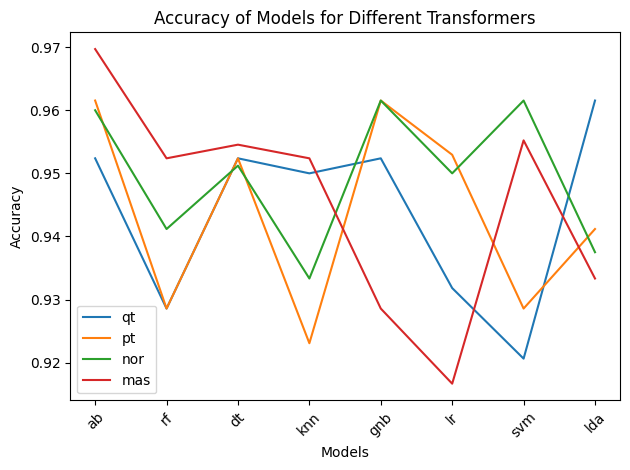

In [43]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
transformers = ['qt', 'pt','nor','mas']
models = ['ab', 'rf', 'dt', 'knn', 'gnb', 'lr', 'svm', 'lda']




# Collecting accuracies for each transformer
accuracies = {}
for transformer in transformers:
    accuracies[transformer] = [globals()[f"accuracy_{transformer}_{model}"] for model in models]

# Plotting
fig, ax = plt.subplots()

for transformer in transformers:
    ax.plot(models, accuracies[transformer], label=transformer)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Models for Different Transformers')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
